# Project 1 — Global Temperature Trends (EDA + Plotting)

This notebook analyzes NASA GISTEMP global temperature anomaly data, performs exploratory data analysis, and visualizes trends.

---

**Import libraries and set up matplotlib for plotting.**

In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)

**Load NASA GISTEMP global temperature anomaly data from CSV URL.**

In [2]:
# 2. Load NASA GISTEMP global anomalies (monthly)
# If this URL ever changes, check: https://data.giss.nasa.gov/gistemp/
url = "https://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts+dSST.csv"

df_raw = pd.read_csv(url, skiprows=1)
df_raw.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.29,-0.18,-0.11,-0.20,-0.12,-0.23,-0.21,-.09,-.16,-.23,-.20,-.23,-.19,***,***,-0.14,-.18,-.20
1,1881,-0.16,-0.17,0.04,0.04,0.02,-0.20,-0.07,-.03,-.14,-.21,-.22,-.11,-.10,-.11,-.18,0.03,-.10,-.19
2,1882,0.14,0.15,0.03,-0.19,-0.16,-0.26,-0.21,-.06,-.10,-.25,-.16,-.25,-.11,-.10,.06,-0.10,-.17,-.17
3,1883,-0.32,-0.39,-0.13,-0.17,-0.20,-0.13,-0.08,-.15,-.21,-.14,-.22,-.16,-.19,-.20,-.32,-0.17,-.12,-.19
4,1884,-0.16,-0.08,-0.37,-0.43,-0.37,-0.41,-0.35,-.26,-.27,-.24,-.30,-.29,-.29,-.28,-.13,-0.39,-.34,-.27


**Clean and reshape the data for analysis.**

In [3]:
# 3. Clean & reshape
month_cols = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df = df_raw[['Year'] + month_cols].copy()

# Convert year to int
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

# Replace '***' or invalid with NaN, then to numeric
for m in month_cols:
    df[m] = pd.to_numeric(df[m], errors='coerce')

# Melt into long format
long = df.melt(id_vars='Year', value_vars=month_cols, var_name='Month', value_name='Anomaly_C')
long = long.dropna(subset=['Anomaly_C']).reset_index(drop=True)

# Map month names to numbers
month_to_num = {m:i for i,m in enumerate(month_cols, start=1)}
long['MonthNum'] = long['Month'].map(month_to_num)

# Create datetime index
long['Date'] = pd.to_datetime(dict(year=long['Year'], month=long['MonthNum'], day=1))

long.head()

,Year,Month,Anomaly_C,MonthNum,Date
0,1880,Jan,-0.29,1,1880-01-01
1,1881,Jan,-0.16,1,1881-01-01
2,1882,Jan,0.14,1,1882-01-01
3,1883,Jan,-0.32,1,1883-01-01
4,1884,Jan,-0.16,1,1884-01-01


**Aggregate anomalies by year and calculate a 10-year rolling mean.**

In [4]:
# 4. Annual aggregation & rolling mean
annual = long.groupby('Year', as_index=False)['Anomaly_C'].mean()
annual = annual.dropna()

annual['Rolling10'] = annual['Anomaly_C'].rolling(window=10, min_periods=1).mean()

annual.tail(12)

,Year,Anomaly_C,Rolling10
128,2008,0.515833,0.551917
129,2009,0.631667,0.575417
130,2010,0.696667,0.605167
131,2011,0.582500,0.610500
132,2012,0.617500,0.610167
133,2013,0.646667,0.614333
134,2014,0.731667,0.634333
135,2015,0.865833,0.654250
136,2016,0.991667,0.691750
137,2017,0.902500,0.718250


**Plot annual temperature anomalies and the 10-year rolling mean.**

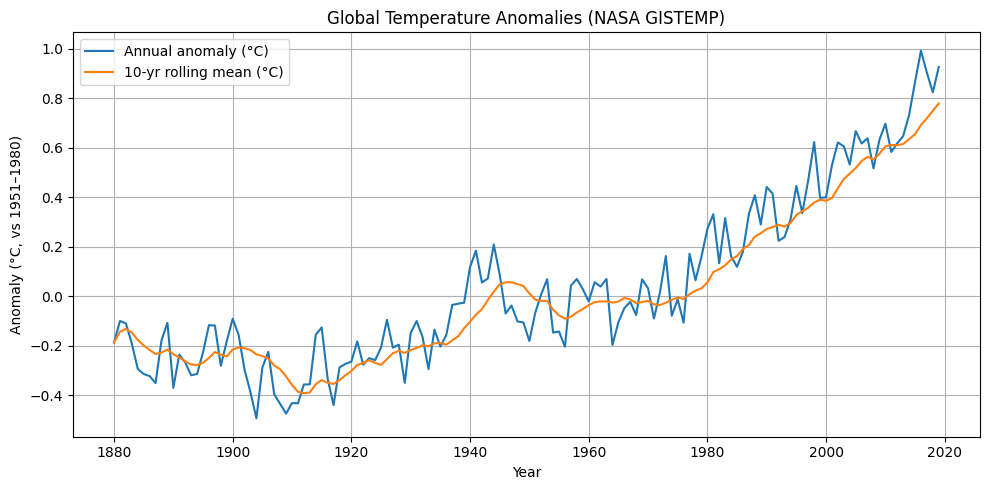

In [5]:
# 5. Plot: Annual anomaly + rolling mean
fig = plt.figure()
plt.plot(annual['Year'], annual['Anomaly_C'], label='Annual anomaly (°C)')
plt.plot(annual['Year'], annual['Rolling10'], label='10-yr rolling mean (°C)')
plt.title('Global Temperature Anomalies (NASA GISTEMP)')
plt.xlabel('Year')
plt.ylabel('Anomaly (°C, vs 1951–1980)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Display the top 10 warmest years based on annual anomaly.**

In [6]:
# 6. Top-10 warmest years
top10 = annual.nlargest(10, 'Anomaly_C').sort_values('Year')
print("Top 10 warmest years:")
print(top10)

Top 10 warmest years:
     Year  Anomaly_C  Rolling10
125  2005   0.666667   0.517500
127  2007   0.637500   0.562583
130  2010   0.696667   0.605167
133  2013   0.646667   0.614333
134  2014   0.731667   0.634333
135  2015   0.865833   0.654250
136  2016   0.991667   0.691750
137  2017   0.902500   0.718250
138  2018   0.823333   0.749000
139  2019   0.925714   0.778405


**Visualize monthly temperature anomalies as a heatmap.**

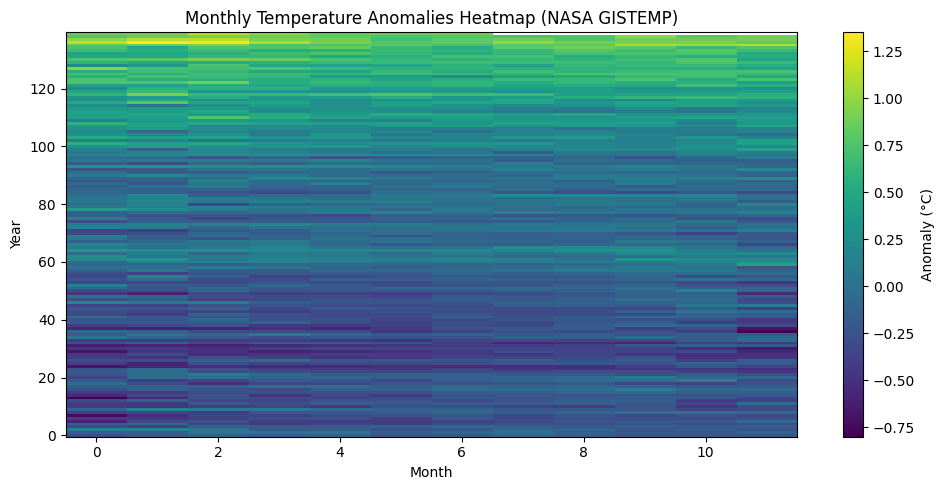

In [7]:
# 7. Optional: Monthly heatmap
heat = long.pivot_table(index='Year', columns='MonthNum', values='Anomaly_C', aggfunc='mean')
fig = plt.figure()
plt.imshow(heat, aspect='auto', origin='lower', interpolation='nearest')
plt.title('Monthly Temperature Anomalies Heatmap (NASA GISTEMP)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.colorbar(label='Anomaly (°C)')
plt.tight_layout()
plt.show()